In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../Sampled Dataset/Without Kmeans 50-50 Sampled.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,-0.305610,1
1,0.775570,-0.770648,0.936321,1.312951,-1.060369,0.343982,-0.509566,0.281372,0.823800,-0.081314,...,0.064923,-0.121614,-0.206049,-0.029554,0.318518,-0.420916,0.025195,0.054102,0.307804,0
2,-0.098257,0.277438,0.682605,0.541734,0.744008,0.239270,0.852291,-0.130182,0.684496,-0.425860,...,0.382471,1.551722,-0.164158,0.716621,-0.432961,-0.479633,0.110424,0.034605,-0.235720,0
3,-1.093755,0.557129,1.603202,0.008525,1.060342,0.071394,0.476971,0.216907,-0.400491,-0.607183,...,-0.046997,-0.050579,-0.460900,-0.290351,0.782954,-0.449391,-0.104006,-0.067875,-0.415446,0
4,-1.369120,1.099830,1.393934,-0.638975,-0.588518,0.260273,0.216639,0.545081,-0.049583,-0.726512,...,-0.043952,-0.411460,-0.199765,-0.463215,0.240325,-0.432551,-0.427597,-0.019662,-0.176961,0


In [7]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [10]:
y_pred = dt.predict(X_test)

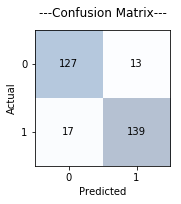

True Positive= 127 , True Negetive= 139 , False Positive= 17 , False Negetive= 13 

The accuracy is 89.8648648649 %
The recall is 90.7142857143 %
The precision is 88.1944444444 %
The F1 Score is 89.4366197183 %


In [11]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

def confusion_matrix_1(CM):
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("---Confusion Matrix---")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    TP=CM[0,0]
    FN=CM[0,1]
    FP=CM[1,0]
    TN=CM[1,1]
    
    print("True Positive=",TP,", True Negetive=",TN,", False Positive=",FP,", False Negetive=",FN,"\n")
    
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*precision*recall)/(precision+recall)
    
    print("The accuracy is "+str(accuracy*100) + " %")
    print("The recall is "+ str(recall*100) +" %")
    print("The precision is "+ str(precision*100) +" %")
    print("The F1 Score is "+ str(f1*100) +" %")
        
confusion_matrix_1(cm1)